In [1]:
import rsgislib.tools.utils
import rsgislib.tools.plotting


import pandas
import numpy

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
chng_m_nm_areas_json = "chng_areas_mangroves_notmangroves.json"
chng_nm_m_areas_json = "chng_areas_notmangroves_mangroves.json"

In [3]:
chng_m_nm_areas = rsgislib.tools.utils.read_json_to_dict(chng_m_nm_areas_json)
chng_nm_m_areas = rsgislib.tools.utils.read_json_to_dict(chng_nm_m_areas_json)

In [17]:
gmw_years = [1996, 2007, 2008, 2009, 2010, 2015, 2016, 2017, 2018, 2019, 2020]
gmw_chng_years = [2007, 2008, 2009, 2010, 2015, 2016, 2017, 2018, 2019, 2020]
period_of_chng = [2007-1996, 2008-2007, 2009-2008, 2010-2009, 2015-2010, 2016-2015, 2017-2016, 2018-2017, 2019-2018, 2020-2019]
period_of_chng

[11, 1, 1, 1, 5, 1, 1, 1, 1, 1]

In [5]:
pxl_size_threses = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
sum_m_nm_area_data = dict()
sum_nm_m_area_data = dict()
sum_m_nm_area_norm_data = dict()
sum_nm_m_area_norm_data = dict()

for pxl_size_thres in pxl_size_threses:
    sum_m_nm_area_data[pxl_size_thres] = list()
    sum_nm_m_area_data[pxl_size_thres] = list()
    sum_m_nm_area_norm_data[pxl_size_thres] = list()
    sum_nm_m_area_norm_data[pxl_size_thres] = list()
    for i, year in enumerate(gmw_chng_years):
        sum_m_nm_area_data[pxl_size_thres].append(numpy.sum(chng_m_nm_areas["clmp_size"][f"{pxl_size_thres}"][f"{year}"]))
        sum_nm_m_area_data[pxl_size_thres].append(numpy.sum(chng_nm_m_areas["clmp_size"][f"{pxl_size_thres}"][f"{year}"]))
        sum_m_nm_area_norm_data[pxl_size_thres].append(numpy.sum(chng_m_nm_areas["clmp_size"][f"{pxl_size_thres}"][f"{year}"])/period_of_chng[i])
        sum_nm_m_area_norm_data[pxl_size_thres].append(numpy.sum(chng_nm_m_areas["clmp_size"][f"{pxl_size_thres}"][f"{year}"])/period_of_chng[i])
    
    

In [20]:
sum_m_nm_area_df = pandas.DataFrame(data=sum_m_nm_area_data, index=gmw_chng_years)
sum_nm_m_area_df = pandas.DataFrame(data=sum_nm_m_area_data, index=gmw_chng_years)

sum_m_nm_area_norm_df = pandas.DataFrame(data=sum_m_nm_area_norm_data, index=gmw_chng_years)
sum_nm_m_area_norm_df = pandas.DataFrame(data=sum_nm_m_area_norm_data, index=gmw_chng_years)

In [21]:
sum_m_nm_area_norm_df

,0,1,2,3,4,5,6,7,8,9,10
2007,2318.367256,2092.482974,1969.465576,1886.535659,1817.471914,1763.043449,1718.354330,1679.792003,1647.717737,1617.259316,1587.173881
2008,9846.268714,6075.464462,4223.886998,3099.059991,2424.900789,1992.179718,1688.547365,1481.823859,1312.010848,1197.332290,1097.127178
2009,5980.009718,3047.771319,1937.983239,1380.899999,1076.360969,909.395617,795.569709,703.848254,641.570014,591.551177,550.977703
2010,6779.071831,3593.190620,2287.523688,1630.391671,1259.669546,1036.520139,907.877489,818.381686,752.444720,697.092645,659.767566
2015,2388.168186,1657.552811,1332.344141,1153.045764,1049.179038,987.403889,941.942554,908.142705,884.721685,864.388510,848.669389
2016,7346.684121,3761.561695,2347.871224,1655.320238,1285.931785,1056.219720,928.020679,837.809638,773.376159,722.541462,682.896048
2017,7391.214164,4063.897885,2795.078586,2196.014861,1904.109719,1740.170309,1643.743043,1578.510673,1521.062985,1476.700906,1438.126719
2018,6763.687290,3832.933485,2572.480825,1874.124341,1451.315290,1208.215910,1040.588918,934.946793,859.292231,805.928270,761.134939
2019,7886.518485,4766.867759,3351.810922,2535.070857,2026.136934,1698.988703,1485.327131,1329.782461,1225.934585,1155.974762,1093.064598
2020,11242.651253,8038.718744,6422.481105,5397.587109,4694.174879,4152.756708,3748.100276,3427.502866,3166.673332,2958.682350,2787.993436


In [22]:
sum_m_nm_area_df.to_csv("chng_areas_mangroves_notmangroves_summary.csv")
sum_nm_m_area_df.to_csv("chng_areas_notmangroves_mangrove_summary.csv")

sum_m_nm_area_norm_df.to_csv("chng_areas_mangroves_notmangroves_summary_norm.csv")
sum_nm_m_area_norm_df.to_csv("chng_areas_notmangroves_mangrove_summary_norm.csv")

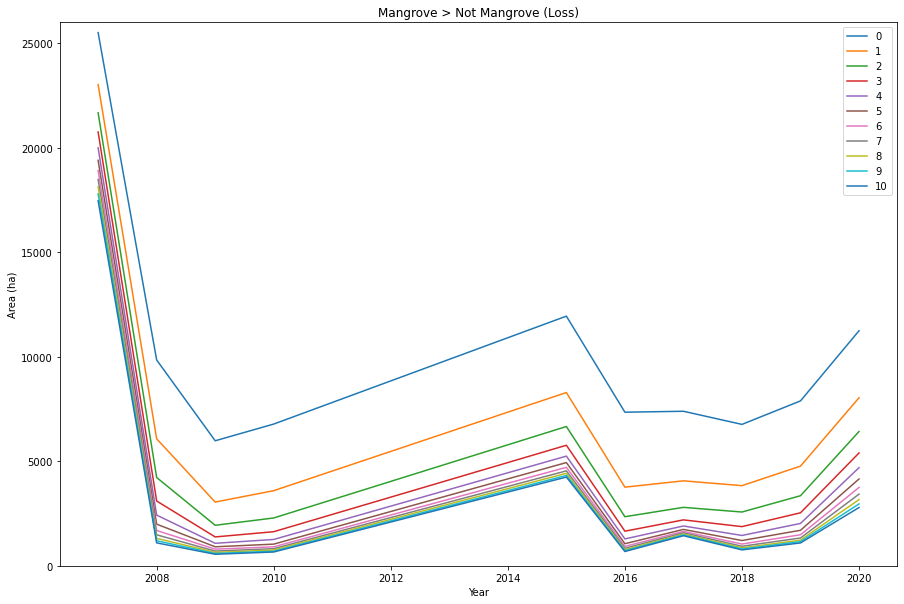

In [29]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

for pxl_size_thres in pxl_size_threses:
    ax1.plot(gmw_chng_years, sum_m_nm_area_df[pxl_size_thres], label=f"{pxl_size_thres}")
    
ax1.set_title("Mangrove > Not Mangrove (Loss)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Area (ha)")
ax1.legend()
ax1.set_ylim([0, 26000])
plt.savefig("Mangrove_Loss_Pixel_thresold.pdf")

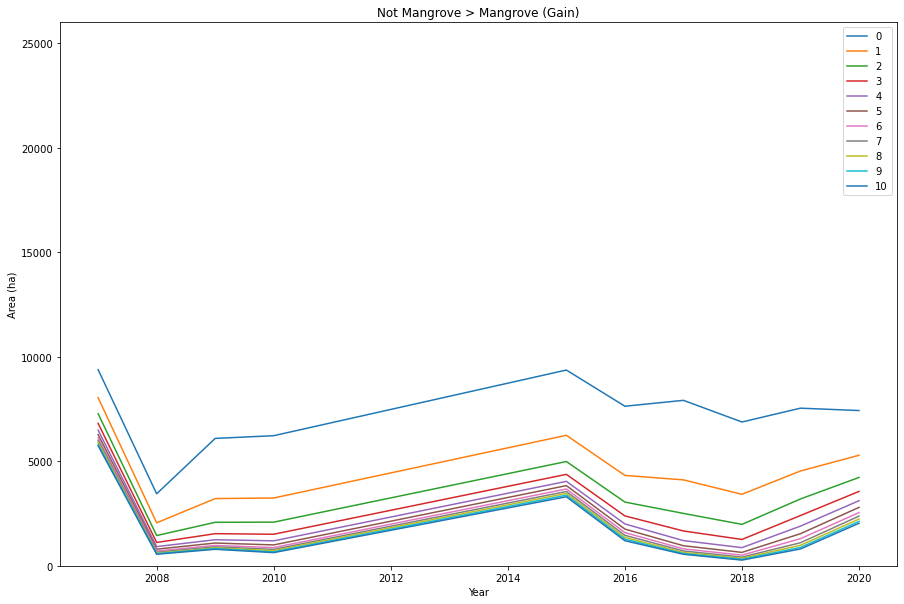

In [30]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

for pxl_size_thres in pxl_size_threses:
    ax1.plot(gmw_chng_years, sum_nm_m_area_data[pxl_size_thres], label=f"{pxl_size_thres}")
    
ax1.set_title("Not Mangrove > Mangrove (Gain)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Area (ha)")
ax1.legend()
ax1.set_ylim([0, 26000])
plt.savefig("Mangrove_Gain_Pixel_thresold.pdf")

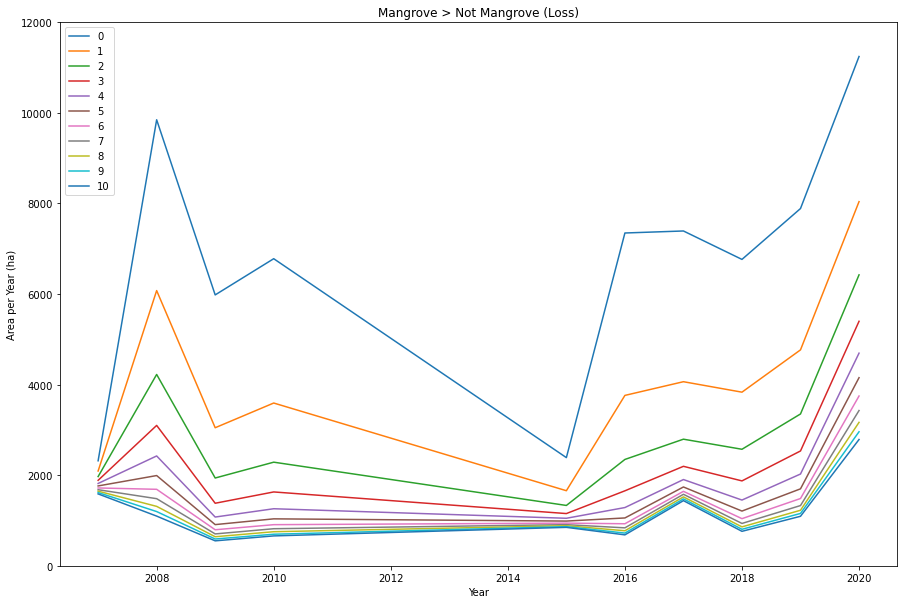

In [27]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

for pxl_size_thres in pxl_size_threses:
    ax1.plot(gmw_chng_years, sum_m_nm_area_norm_df[pxl_size_thres], label=f"{pxl_size_thres}")
    
ax1.set_title("Mangrove > Not Mangrove (Loss)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Area per Year (ha)")
ax1.legend()
ax1.set_ylim([0, 12000])
plt.savefig("Mangrove_Loss_Pixel_thresold_norm.pdf")

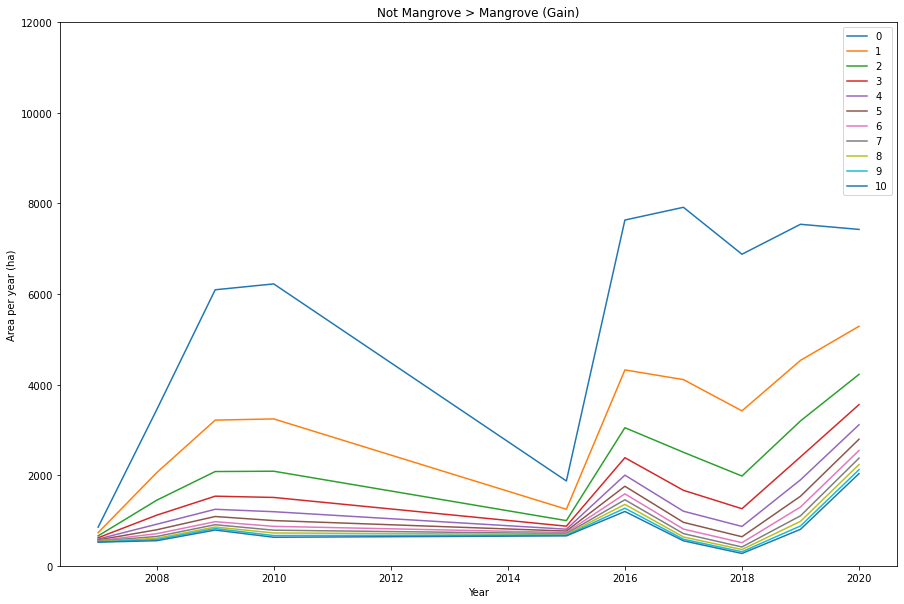

In [26]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

for pxl_size_thres in pxl_size_threses:
    ax1.plot(gmw_chng_years, sum_nm_m_area_norm_df[pxl_size_thres], label=f"{pxl_size_thres}")
    
ax1.set_title("Not Mangrove > Mangrove (Gain)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Area per year (ha)")
ax1.legend()
ax1.set_ylim([0, 12000])
plt.savefig("Mangrove_Gain_Pixel_thresold_norm.pdf")

In [12]:
sum_m_nm_culm_area_data = dict()
sum_nm_m_culm_area_data = dict()

for pxl_size_thres in reversed(pxl_size_threses):
    sum_m_nm_culm_area_data[pxl_size_thres] = list()
    sum_nm_m_culm_area_data[pxl_size_thres] = list()


for year in gmw_chng_years:
    culm_m_nm_sum = 0
    culm_nm_m_sum = 0
    for pxl_size_thres in reversed(pxl_size_threses):
        m_nm_area = numpy.sum(chng_m_nm_areas["clmp_size"][f"{pxl_size_thres}"][f"{year}"])-culm_m_nm_sum
        m_nm_area = numpy.sum(chng_nm_m_areas["clmp_size"][f"{pxl_size_thres}"][f"{year}"])-culm_nm_m_sum
        sum_m_nm_culm_area_data[pxl_size_thres].append(m_nm_area)
        sum_nm_m_culm_area_data[pxl_size_thres].append(m_nm_area)
        culm_m_nm_sum += m_nm_area
        culm_nm_m_sum += m_nm_area


In [13]:
sum_m_nm_culm_area_df = pandas.DataFrame(data=sum_m_nm_culm_area_data, index=gmw_chng_years)
sum_nm_m_culm_area_df = pandas.DataFrame(data=sum_nm_m_culm_area_data, index=gmw_chng_years)

In [15]:
sum_m_nm_culm_area_df.to_csv("chng_areas_mangroves_notmangroves_culm_summary.csv")
sum_nm_m_culm_area_df.to_csv("chng_areas_notmangroves_mangrove_culm_summary.csv")

In [ ]:
fig, ax1 = plt.subplots(1, figsize=(15, 10))

for pxl_size_thres in pxl_size_threses:
    ax1.plot(gmw_chng_years, sum_m_nm_area_df[pxl_size_thres], label=f"{pxl_size_thres}")
    
ax1.set_title("Mangrove > Not Mangrove (Loss)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Area (ha)")
ax1.legend()
plt.savefig("Mangrove_Loss_Pixel_thresold.pdf")

In [ ]:
fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()